<a href="https://colab.research.google.com/github/rohitp1/AppliedAI/blob/main/Exploratory%20Data%20Analysis/Haberman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#            **HABERMAN DATA ANALYSIS**

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Dataframe from github
Putting datafile in github and then getting url from there calling read_csv 
and then see 1st 10 records of dataframe

In [ ]:
url = 'https://raw.githubusercontent.com/rohitp1/hello/master/haberman.csv'
df = pd.read_csv(url , header=None)
print(df.head(10))

    0   1   2  3
0  30  64   1  1
1  30  62   3  1
2  30  65   0  1
3  31  59   2  1
4  31  65   4  1
5  33  58  10  1
6  33  60   0  1
7  34  59   0  2
8  34  66   9  2
9  34  58  30  1


##(Q) how many data-points and features?

In [ ]:
print(df.shape)

(306, 4)


## (Q) What are the column names in our dataset?
first we will rename columns name then view it using `df.columns`






*   Age of patient at the time of operation (numerical)
*   Patient's year of operation (year - 1900, numerical)

*   Number of positive axillary nodes detected (numerical)
*   Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 years





In [ ]:
df = df.rename(columns={0:'Age',1:'OP_Year',2:'Axil_Nodes',3:'Survival_Status'},inplace=False)
df['Survival_Status'] = df['Survival_Status'].map({1:'yes',2:'no'})
print(df.columns)

Index(['Age', 'OP_Year', 'Axil_Nodes', 'Survival_Status'], dtype='object')


## (Q) How many data points for each class are present?

we see 2 classes --- 
 

*   `1` denotes patient survived cancer operation (here no of people of this class is 225)
*   `2` denotes patient did not survived cancer operation (here no of people of this class is 81)





In [ ]:
df['Survival_Status'].value_counts()

yes    225
no      81
Name: Survival_Status, dtype: int64

# 2-D Scatter Plot

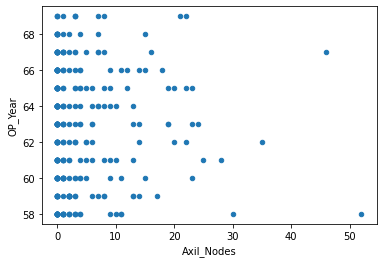

In [ ]:
df.plot(kind = 'scatter' , x = 'Axil_Nodes' , y= 'OP_Year' );
plt.show()

Using sns to color code data point according to classes

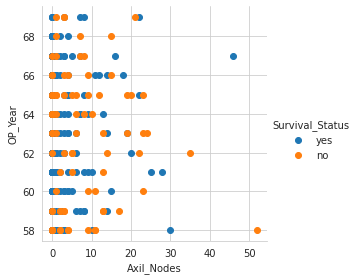

In [ ]:
sns.set_style('whitegrid');
sns.FacetGrid(df,hue="Survival_Status",height =4) \
    .map(plt.scatter,"Axil_Nodes" , "OP_Year") \
    .add_legend();
plt.show();

## Observations : 


*   We can't seem to clearly divide between two categories using scatter plot
*   Trying every possible pair with pair plot



## Pair Plot

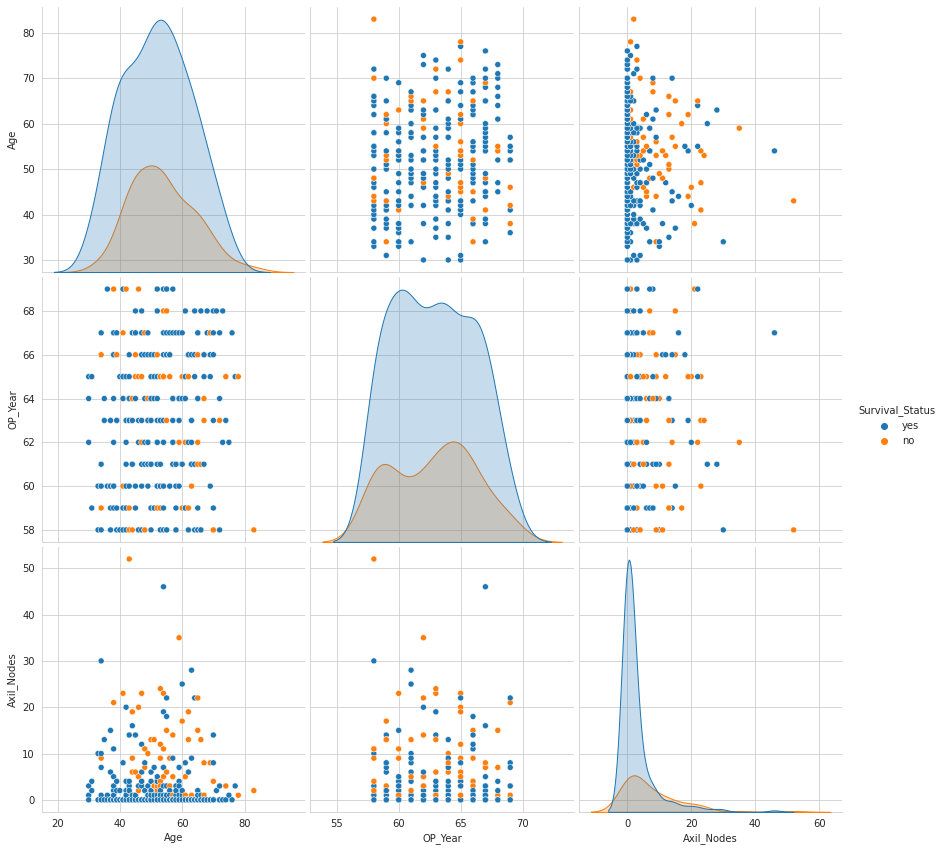

In [ ]:
plt.close()
sns.set_style("whitegrid");
sns.pairplot(df,hue="Survival_Status",height=4)
plt.show()

## Observation


*   We can't determine which is most important feature in dataset by pairplots
*   Axil_Nodes and Age seems to be the most important features of dataset
*   This dataset is not linearly seperable as iris dataset






# Histogram , PDFs , CDFs


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


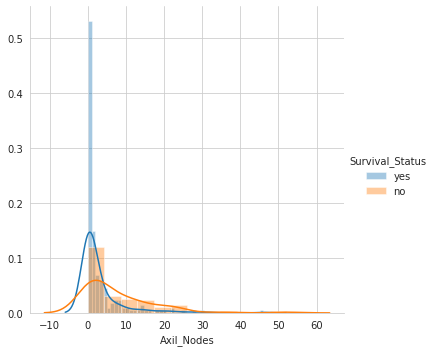

In [ ]:
sns.FacetGrid(df,hue = "Survival_Status",height=5) \
    .map(sns.distplot,"Axil_Nodes") \
    .add_legend();
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


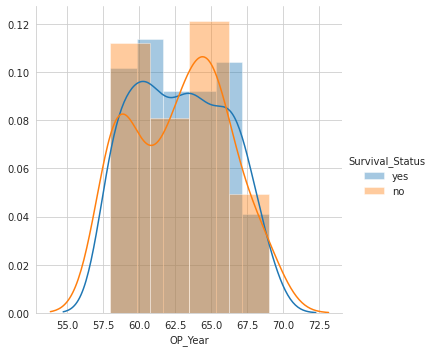

In [ ]:
sns.FacetGrid(df,hue = "Survival_Status",height=5) \
    .map(sns.distplot,"OP_Year") \
    .add_legend();
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


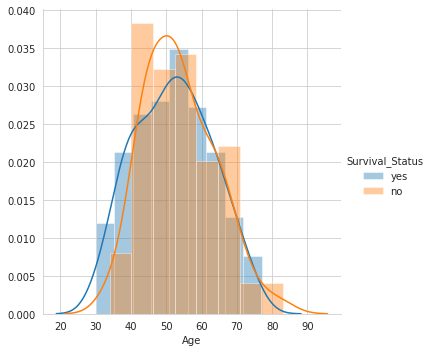

In [ ]:
sns.FacetGrid(df,hue = "Survival_Status",height=5) \
    .map(sns.distplot,"Age") \
    .add_legend();
plt.show();

### CDF

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


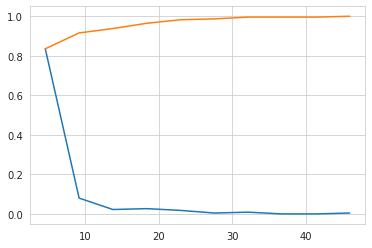

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


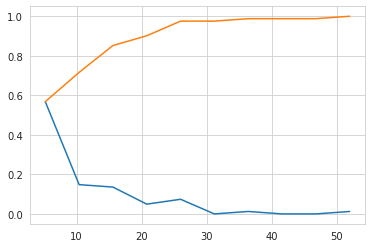

In [ ]:
plt.close();
OP_Survive = df.loc[df["Survival_Status"] == "yes"];
OP_not_Survive = df.loc[df["Survival_Status"] == "no"];


## For Axil_Nodes
#Survived
counts, bin_edges = np.histogram(OP_Survive['Axil_Nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.show();
# Not survived
counts, bin_edges = np.histogram(OP_not_Survive['Axil_Nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.show();


## Observation :
*   roughly 80% of people who survived operation has axil_node size ~5
*   roughly 60% of people who did **NOT** survive operation has axil_node size ~5



# Mean Variance and Std. Deviation

In [ ]:
print("Means :")
print(np.mean(OP_Survive["Axil_Nodes"]))
print(np.mean(OP_not_Survive["Axil_Nodes"]))


print("\nstd dev :")
print(np.std(OP_Survive["Axil_Nodes"]))
print(np.std(OP_not_Survive["Axil_Nodes"]))

Means :
2.7911111111111113
7.45679012345679

std dev :
5.857258449412131
9.128776076761632


### Observation :


*   Patient who did not survive have large average `axil_node` size compared to patients that did survived




# Median, Percentile, Quantile, IQR, MAD

In [ ]:
print("Median :")
print(np.median(OP_Survive["Axil_Nodes"]))
print(np.median(OP_not_Survive["Axil_Nodes"]))


print("\n Quantiles :")
print(np.percentile(OP_Survive["Axil_Nodes"] ,np.arange(0,100,25)))
print(np.percentile(OP_not_Survive["Axil_Nodes"],np.arange(0,100,25)))


print("\n90th percentiles :")
print(np.percentile(OP_Survive["Axil_Nodes"] ,90))
print(np.percentile(OP_not_Survive["Axil_Nodes"],90))

from statsmodels import robust
print("\nMedian Absolute Deviation :")
print(robust.mad(OP_Survive["Axil_Nodes"] ))
print(robust.mad(OP_not_Survive["Axil_Nodes"]))


Median :
0.0
4.0

 Quantiles :
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th percentiles :
8.0
20.0

Median Absolute Deviation :
0.0
5.930408874022408


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Observations:


*   50% of the people survived has `axil_node` of size = 0 and 90% has size <= 8
*   50% of the people **not** survived has `axil_node` of size <= 4 and 90% has size <= 20



# Box Plot and Whiskers

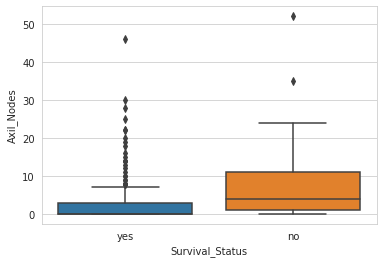

In [ ]:
plt.close();
sns.boxplot(x = 'Survival_Status', y='Axil_Nodes',data = df)
plt.show()

# Violin Plots

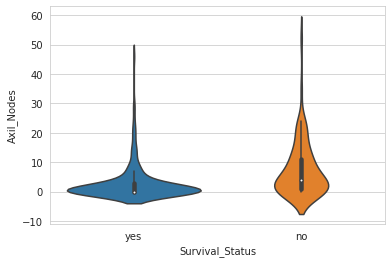

In [ ]:
plt.close();
sns.violinplot(x = 'Survival_Status' , y ='Axil_Nodes',data = df,height = 8);
plt.show()

# Multivariate probability density, contour plot.

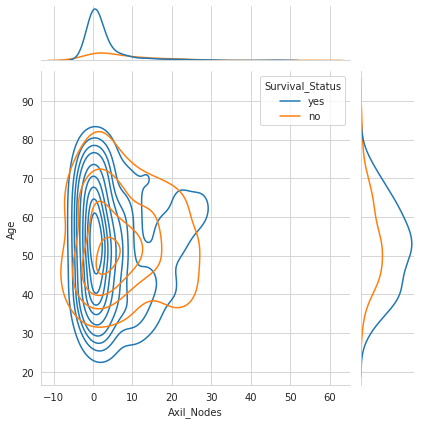

In [ ]:
plt.close();
sns.jointplot(x='Axil_Nodes',y='Age',data = df,hue = 'Survival_Status',kind = 'kde')
plt.show()